In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/Users/nihal/BACapstone/energy_efficiency_data.csv')

In [3]:
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<Axes: >

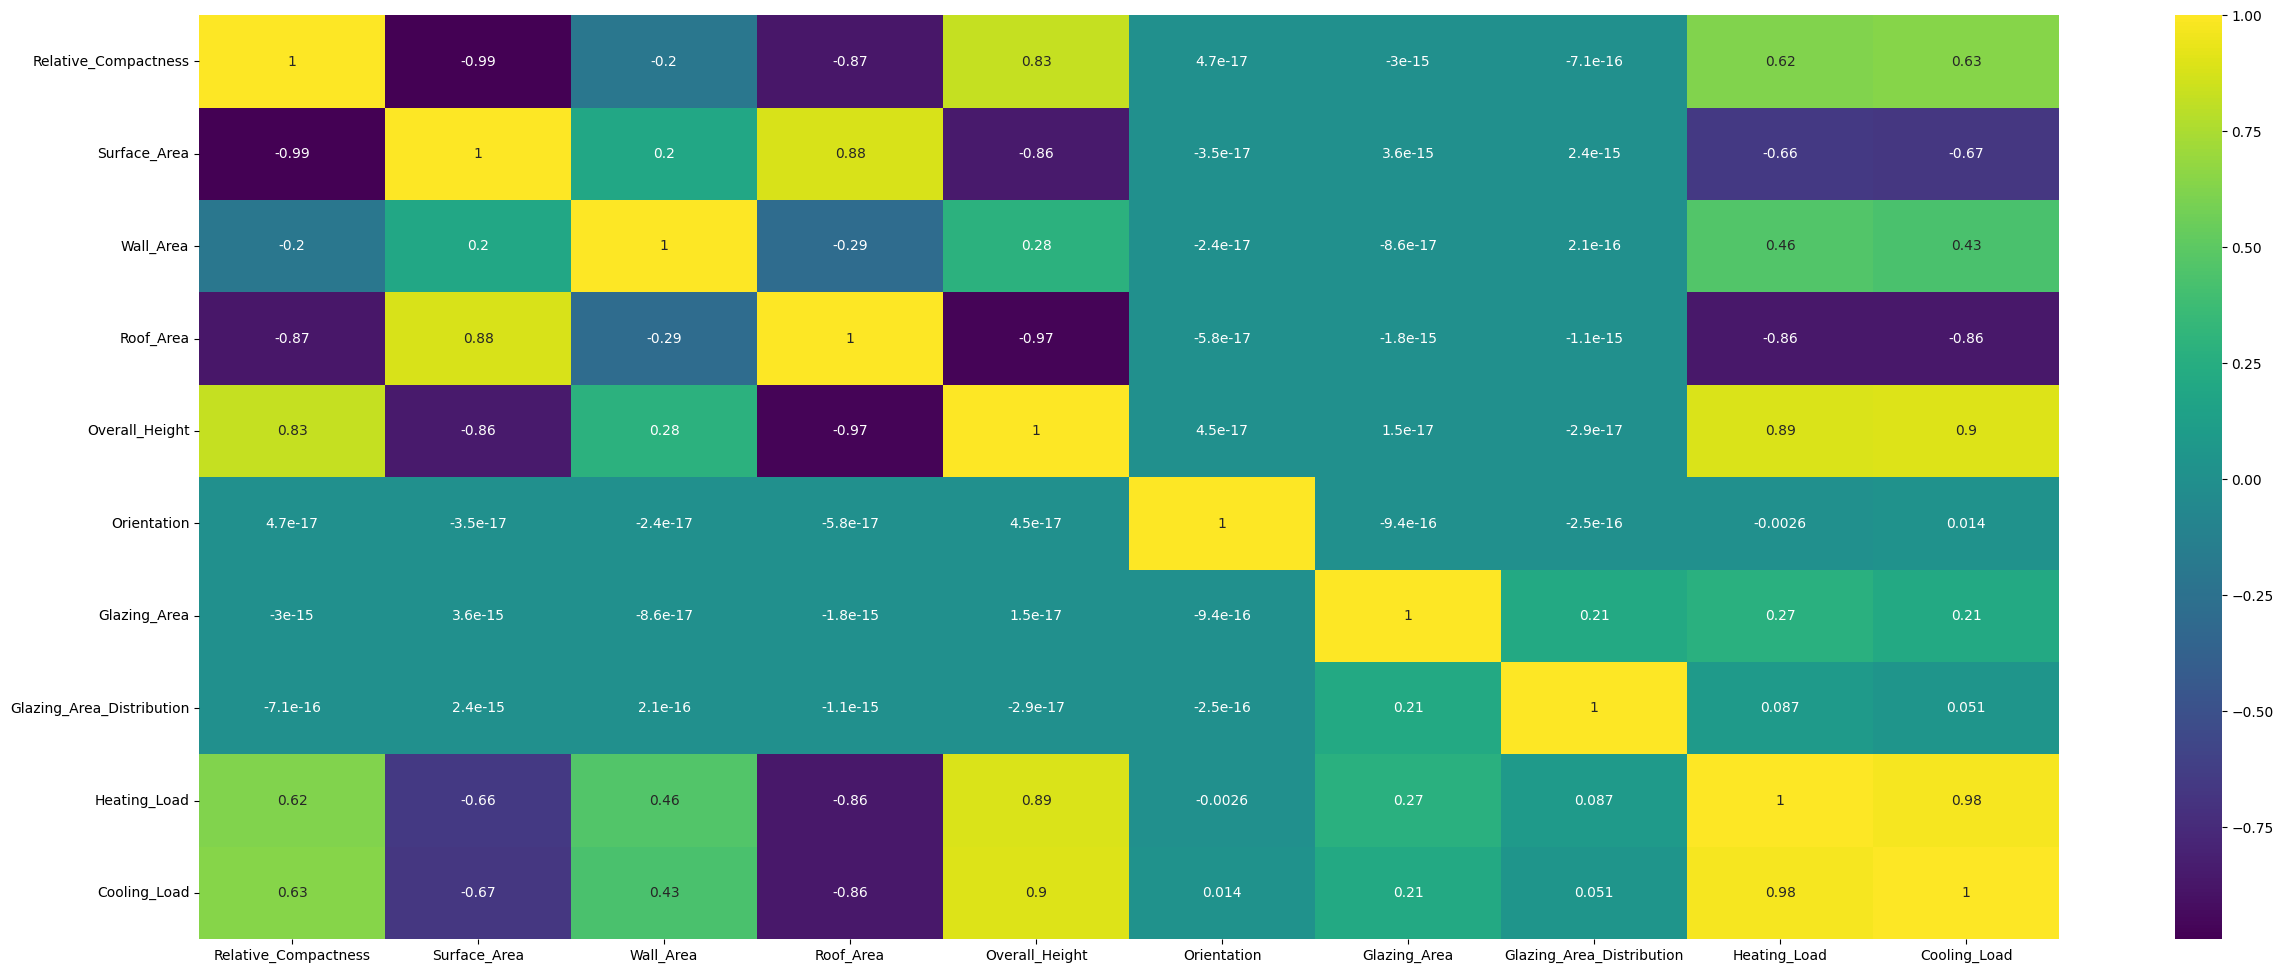

In [6]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,12))
sns.heatmap(corr, cmap="viridis", annot=True)

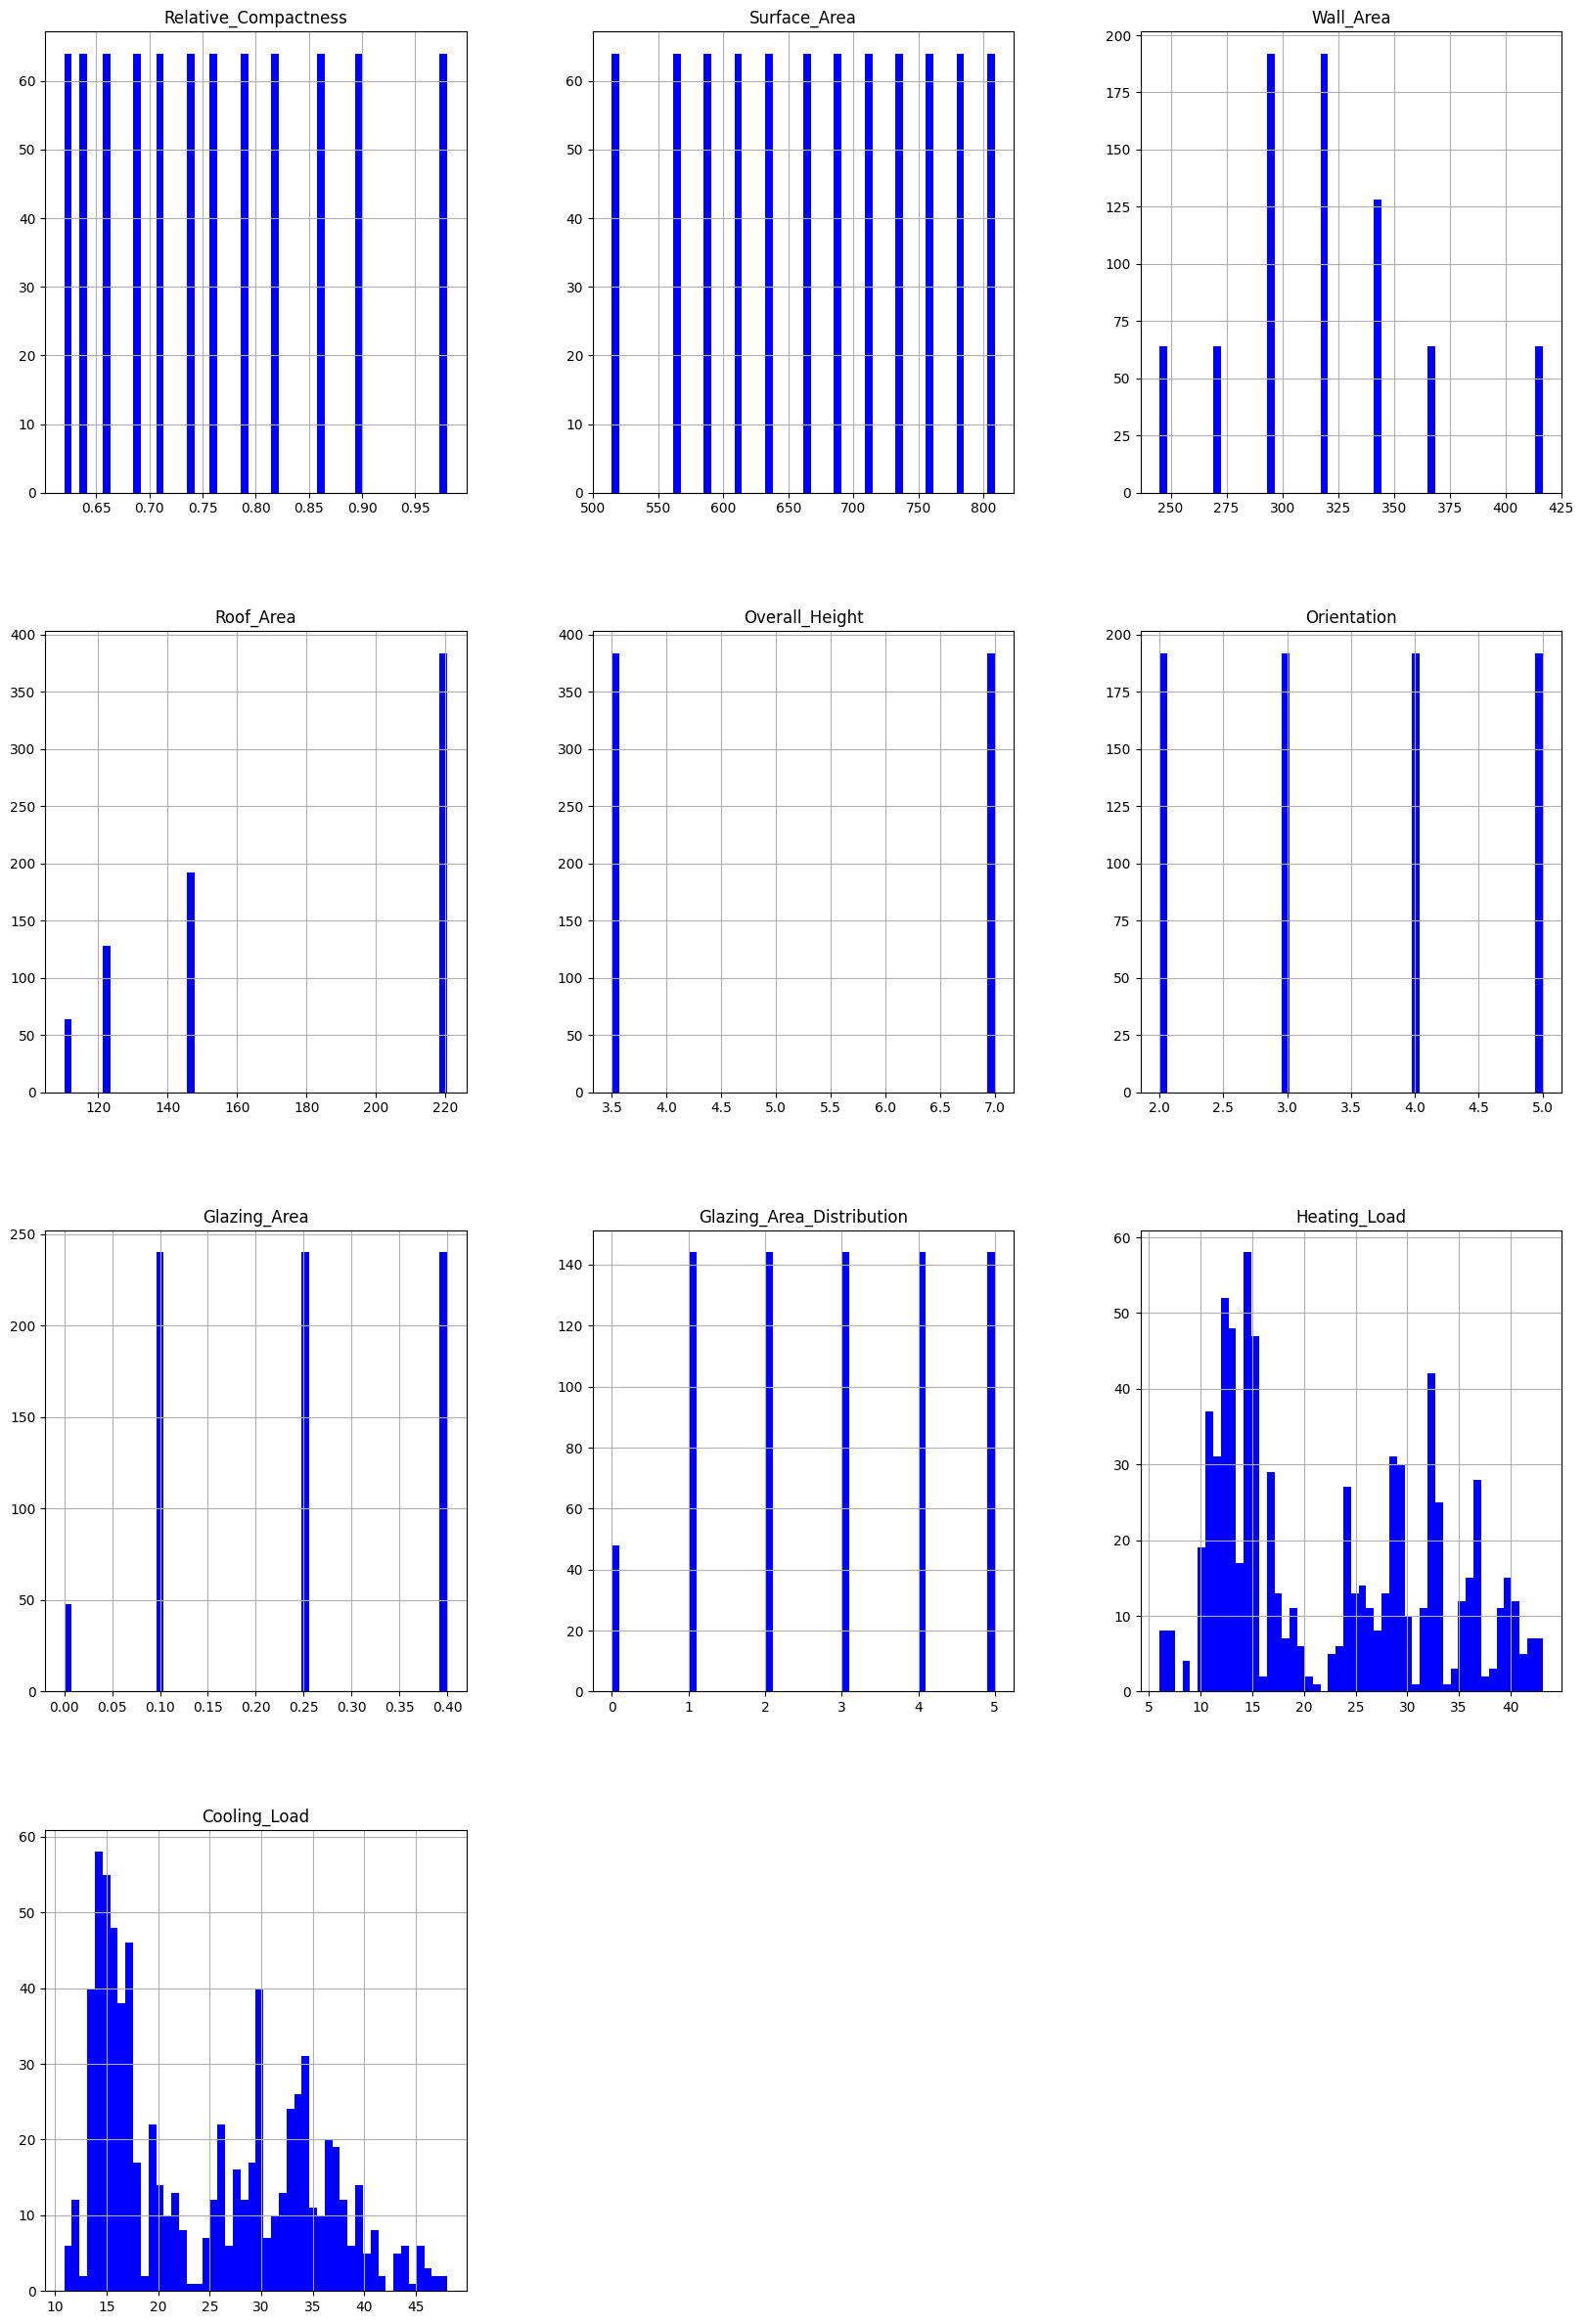

In [7]:
df.hist(figsize=(20,30), color='blue' ,bins=50, xlabelsize=10, ylabelsize=10);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [9]:
input_features = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area','Glazing_Area_Distribution']]

heating_target = df[['Heating_Load']]

cooling_target = df[['Cooling_Load']]

In [10]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
normalized_features = min_max_scaler.fit_transform(input_features)
standardized_features = standard_scaler.fit_transform(input_features)

In [11]:
features_train, features_test, heating_target_train, heating_target_test, cooling_target_train, cooling_target_test = train_test_split(normalized_features, heating_target, cooling_target, test_size=0.33, random_state = 42)

In [12]:
accuracy_df = pd.DataFrame(index=None, 
                   columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

list_of_regressors = [['SVR', SVR()],
                      ['DecisionTreeRegressor', DecisionTreeRegressor()],
                      ['KNeighborsRegressor', KNeighborsRegressor()],
                      ['RandomForestRegressor', RandomForestRegressor()],
                      ['MLPRegressor', MLPRegressor()],
                      ['AdaBoostRegressor', AdaBoostRegressor()],
                      ['GradientBoostingRegressor', GradientBoostingRegressor()],
                      ['LinearRegression', LinearRegression()]]

In [13]:
results = []

for regressor_info in list_of_regressors:
    regressor_name = regressor_info[0]  
    regressor_model = regressor_info[1]  
    regressor_model.fit(features_train, heating_target_train)
    heating_train_score = r2_score(heating_target_train, regressor_model.predict(features_train))
    heating_test_score = r2_score(heating_target_test, regressor_model.predict(features_test))
    regressor_model.fit(features_train, cooling_target_train)
    cooling_train_score = r2_score(cooling_target_train, regressor_model.predict(features_train))
    cooling_test_score = r2_score(cooling_target_test, regressor_model.predict(features_test))

    result_dict = {
        'model': regressor_name, 
        'train_Heating': heating_train_score,
        'test_Heating': heating_test_score,
        'train_Cooling': cooling_train_score,
        'test_Cooling': cooling_test_score}
    
    results.append(result_dict)
    
accuracy_df = pd.DataFrame(results)

sorted_accuracy_df = accuracy_df.sort_values(by='test_Cooling')

In [14]:
accuracy_df

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
0,SVR,0.925069,0.918868,0.891179,0.883210
1,DecisionTreeRegressor,1.000000,0.996518,1.000000,0.963460
2,KNeighborsRegressor,0.945700,0.916122,0.927994,0.899714
3,RandomForestRegressor,0.999623,0.997525,0.994981,0.971098
4,MLPRegressor,0.883676,0.877985,0.829291,0.827670
5,AdaBoostRegressor,0.964765,0.963261,0.938766,0.939216
6,GradientBoostingRegressor,0.998356,0.997671,0.981346,0.977543
7,LinearRegression,0.915837,0.915675,0.886011,0.889315


In [15]:
# Random Forest Regressor is the best model for predicting Heating_Load
# and Cooling_Load. Decision Tree is another model which can be
# implemented as well. Depending on cost and time, any of these two
# models can be implemented.